## Using Python, DataFrames and Machine Learning to Segment and cluster Location Data
## The Case of African/Caribbean Restaurant in Indianapolis Neighborhoods
###Description of Project:
The use of a computational method to determine the best location for an African/Caribbean cuisine in the neighborhoods of the City of Indianapolis in the state of Indiana USA.



# 	INTRODUCTION.
###  Contextual background.
Indianapolis is the Capital of the state of Indiana and according to the World Population Review, it is the 13th largest city in the United States.  The World Review also reports that it was also recently ranked by Forbes as one of the best downtowns in the country with movie theaters, museums, art galleries, parks, retail shops, and entertainment, and its greater area has seen moderate growth in the past few years.

#### The demographics of Indianapolis City
From the 2012 Census Population Estimates/Indianapolis Metro Counties, it was announced in 2013 that African Americans in Indianapolis had had reached a new milestone with an increase of 3.9% over the 2010 Census data.  According to the most recent census figures from the US Census 2018 ACS 5-Year Survey (Table B03002), the racial composition of Indianapolis was as contained in the table below.The Back or African Americans race has a population of 243,008 representing 28.33% of the Indianapolis population. The population percentage for other race apart from the white are less than 4.0%.


#### A visualization of the  Indianapolis population percentages by race.

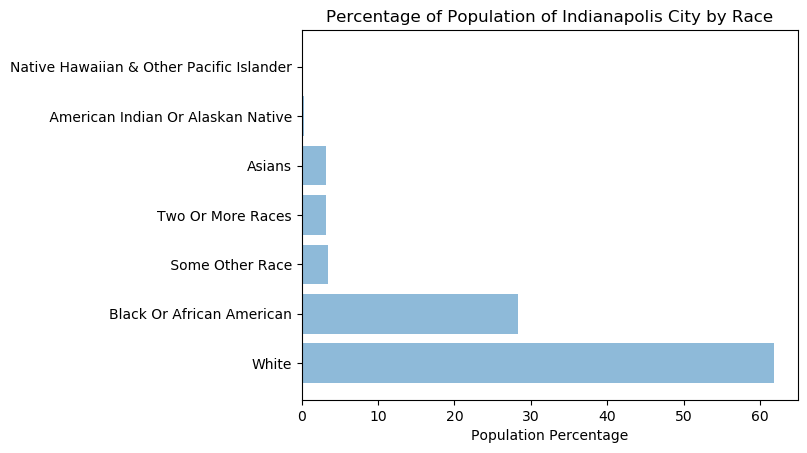

In [2]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

data = ('White', 'Black Or African American',' Some Other Race',
           'Two Or More Races', 'Asians', ' American Indian Or Alaskan Native',
           'Native Hawaiian & Other Pacific Islander')
y_plot = np.arange(len(data))
performance = [61.80, 28.33, 3.47, 3.24, 3.23, 0.27, 0.05]

plt.barh(y_plot, performance, align='center', alpha=0.5)
plt.yticks(y_plot, data)
plt.xlabel('Population Percentage')
plt.title('Percentage of Population of Indianapolis City by Race')
plt.show()

### Importing and installing the dependency Libraries.
The following libraries were imported and used in programming

In [1]:
import numpy as np # Numpy library to handle data in a vectorized manner
import pandas as pd # Pandas library for data analysis

!pip install beautifulsoup4
!pip install lxml
!pip install geopy
# Library of Python used for web scraping of table from the Wikipedia
from bs4 import BeautifulSoup
import json as json # library to handle JSON files
import requests as requests # library to handle requests

# Nominaim to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

from pandas.io.json import json_normalize
# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules 
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!conda install -c conda-forge geopy --yes 
!conda install -c conda-forge folium=0.5.0 --yes 

# print('Libraries imported.')

     |████████████████████████████████| 112kB 10.7MB/s eta 0:00:01
     |████████████████████████████████| 5.8MB 8.4MB/s eta 0:00:01
     |████████████████████████████████| 112kB 9.1MB/s eta 0:00:01
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    numpy-1.18.1               |   py36h95a1406_0         5.2 MB  conda-forge
    liblapacke-3.8.0         

##  DATA
#### Data sources
The project requires location data on population distribution by zip code and by race, zip code geographical 
coordinates, and venues in the Indianapolis city. Data was collected from the US Census 2018 ACS 5-Year Survey 
and Foursquare. The Foursquare API was used to obtain the venues for the geographical location data.

#### Data download and cleaning
##### Download and clean data on Indianapolis population by zip code and by race
After downloading, scraping, wrangling, and cleaning the data, the file on population by zip code and by race  was
 then read into a pandas dataframe.

## Download, Web Scraping, Cleaning and Explore Dataset.

After downloading, scraping, wrangling, and cleaning the data, the file on population by zip code and by race was 
then read into a pandas dataframe.

#### Extract Indianapolis population by zip code and by race.
Indianapolis population is in  7 types of race.  
For this project, the Zip Codes with available population data were extracted.



In [2]:
data = open("population_data.txt")
indianapolis_data = data.read().split('\n') #array

#For our panda frame, we create an array of values for 
#each column(Zipcode, Population and % Population) for each Race

zipcodes = []

whitePopulation = []
percent_whitePopulation = []

blackPopulation = []
percent_blackPopulation = []

americanIndianPopulation = []
percent_americanIndianPopulation = []

asianPopulation = []
percent_asianPopulation = []

hawaianPopulation = []
percent_hawaianPopulation = []

otherPopulation = []
percent_otherPopulation = []

twoOrMorePopulation = []
percent_twoOrMorePopulation = []

#Initializing i to 0 for incrementing
i = 0

while i < len(indianapolis_data)-8: #In order not to go our of bounds, end loop at length - 8
    zipcodes.append(indianapolis_data[i])
    whitePopulation.append(indianapolis_data[i+1].split()[1])
    percent_whitePopulation.append(indianapolis_data[i+1].split()[2])
    
    blackPopulation.append(indianapolis_data[i+2].split()[1])
    percent_blackPopulation.append(indianapolis_data[i+2].split()[2])
    
    americanIndianPopulation.append(indianapolis_data[i+3].split()[1])
    percent_americanIndianPopulation.append(indianapolis_data[i+3].split()[2])
    
    asianPopulation.append(indianapolis_data[i+4].split()[1])
    percent_asianPopulation.append(indianapolis_data[i+4].split()[2])
    
    hawaianPopulation.append(indianapolis_data[i+5].split()[1])
    percent_hawaianPopulation.append(indianapolis_data[i+5].split()[2])
    
    otherPopulation.append(indianapolis_data[i+6].split()[1])
    percent_otherPopulation.append(indianapolis_data[i+6].split()[2])
    
    twoOrMorePopulation.append(indianapolis_data[i+7].split()[1])
    percent_twoOrMorePopulation.append(indianapolis_data[i+7].split()[2])

    i += 8


#### Extract zip code, neighborhood name, latitude and longitude of each zip code

In [3]:
# Get geographical Coordinates

latitude_data = []
longitude_data = []
neighborhood_data = []

for zipcode in zipcodes:
    url = "https://www.zip-codes.com/zip-code/"+zipcode+"/zip-code-"+ zipcode +".asp"
    raw_content = requests.get(url).text
    soup = BeautifulSoup(raw_content,'lxml')
    table = soup.find('table',{'class':'statTable'})
    table_cells = table.findAll('td')
    cordinates = []

    for cell in table_cells:
        text = cell.get_text()
        cordinates.append(text)
        
    latitude = '0.0'    
    longitude = '0.0'
    alias = cordinates[11]
    neighborhood = ''
    
    if(alias[:12] == 'Indianapolis' and len(alias)>12): #new palestine, Fishers
        neighborhood = alias.lstrip('Indianapolis')        
    else:
        neighborhood = alias
        
    neighborhood_data.append(neighborhood)

    if(cordinates[23] == 'Yes'):
        latitude = cordinates[25]
        longitude = cordinates[27]   
    else:
        latitude = cordinates[23]
        longitude = cordinates[25] 
        
    latitude_data.append(latitude)
    longitude_data.append(longitude)


## Merge the data from the two sources into one pandas dataframe.
#### Create a pandas dataframe consisting of Zipcode, neighborhood, population by race (and percentages), latitude, and longitude

In [70]:
#Creating data frame colums using df['column name']
#Assigning columns to arrays respectively
df = pd.DataFrame()

df['Zipcode'] = zipcodes
df['Neighborhood'] = neighborhood_data
df['latitude'] = latitude_data
df['longitude'] = longitude_data
df['White'] = whitePopulation
df['% White'] = percent_whitePopulation
df['Black or African American'] = blackPopulation
df['% Black or African American'] = percent_blackPopulation
df['American Indian or Alaskan Native'] = americanIndianPopulation
df['% American Indian or Alaskan Native'] = percent_americanIndianPopulation
df['Asian'] = asianPopulation
df['% Asian'] = percent_asianPopulation
df['Native Hawaiian and Other Pacific Islander'] = hawaianPopulation
df['%Native Hawaiian and Other Pacific Islander'] = percent_hawaianPopulation
df['Other Race'] = otherPopulation
df['% Other Race'] = percent_otherPopulation
df['Two or More Races'] = twoOrMorePopulation
df['%Two or More Races'] = percent_twoOrMorePopulation

indy_data = df
indy_data

,Zipcode,Neighborhood,latitude,longitude,White,% White,Black or African American,% Black or African American,American Indian or Alaskan Native,% American Indian or Alaskan Native,Asian,% Asian,Native Hawaiian and Other Pacific Islander,%Native Hawaiian and Other Pacific Islander,Other Race,% Other Race,Two or More Races,%Two or More Races
0,46224,Speedway,39.794203,-86.252792,"18,023",51.4%,"9,315",26.5%,161,0.5%,825,2.4%,18,0.1%,"5,546",15.8%,"1,206",3.4%
1,46254,Eagle Creek,39.8447,-86.266276,"11,993",31.5%,"19,769",51.9%,99,0.3%,"1,165",3.1%,6,0.0%,"3,708",9.7%,"1,355",3.6%
2,46038,Fishers,39.963702,-86.011348,"32,806",87.0%,"1,784",4.7%,61,0.2%,"1,773",4.7%,12,0.0%,488,1.3%,799,2.1%
3,46259,Acton,39.64902,-85.993206,"10,972",94.4%,172,1.5%,10,0.1%,218,1.9%,7,0.1%,64,0.6%,174,1.5%
4,46208,Rocky Ripple,39.832028,-86.176608,"9,002",40.5%,"12,242",55.0%,55,0.2%,215,1.0%,2,0.0%,167,0.8%,556,2.5%
5,46220,Indianapolis,39.866058,-86.101651,"28,412",81.6%,"4,533",13.0%,73,0.2%,594,1.7%,8,0.0%,440,1.3%,770,2.2%
6,46241,Indianapolis,39.716911,-86.261552,"24,390",79.5%,"3,178",10.4%,144,0.5%,205,0.7%,7,0.0%,"1,872",6.1%,874,2.8%
7,46204,Indianapolis,39.77275,-86.159447,"3,232",63.1%,"1,500",29.3%,12,0.2%,195,3.8%,1,0.0%,71,1.4%,114,2.2%
8,46202,Indianapolis,39.780667,-86.16635,"9,043",55.4%,"5,802",35.5%,43,0.3%,815,5.0%,7,0.0%,222,1.4%,403,2.5%
9,46219,Warren Park,39.782954,-86.046125,"25,075",73.9%,"5,888",17.4%,106,0.3%,282,0.8%,5,0.0%,"1,677",4.9%,897,2.6%


## Examine the resulting dataframe.  
#### - Let's check on the size of our dataframe   
#### - Create a dataframe for Indianapolis population by race  

In [5]:
# Let's check on the size of our dataframe
indy_data.shape

(40, 18)

Indianapolis city has 41 neighborhoods

#### Create a dataframe for Indianapolis population by race

In [6]:
indy_data_by_race = indy_data

i = 0
sum_white = 0
sum_blackPopulation = 0
sum_americanIndianPopulation = 0
sum_asianPopulation = 0
sum_hawaianPopulation = 0
sum_otherPopulation = 0
sum_twoOrMorePopulation = 0
while i < 40:
    sum_white += pd.to_numeric(whitePopulation[i].replace(',', ''))
    sum_blackPopulation += pd.to_numeric(blackPopulation[i].replace(',', ''))
    sum_americanIndianPopulation += pd.to_numeric(americanIndianPopulation[i].replace(',', ''))
    sum_asianPopulation += pd.to_numeric(asianPopulation[i].replace(',', ''))
    sum_hawaianPopulation += pd.to_numeric(hawaianPopulation[i].replace(',', ''))
    sum_otherPopulation += pd.to_numeric(otherPopulation[i].replace(',', ''))
    sum_twoOrMorePopulation += pd.to_numeric(twoOrMorePopulation[i].replace(',', ''))
    i += 1

indy_data_by_races = ['White','Black or African American',
                             'American Indian or Alaskan Native',
                             'Asian','Native Hawaiian and Other Pacific Islander',
                             'Other Race','Two or More Races']

sum_array = [sum_white,sum_blackPopulation,sum_americanIndianPopulation,
             sum_asianPopulation,sum_hawaianPopulation,sum_otherPopulation,
             sum_twoOrMorePopulation]

race_frame = pd.DataFrame()



total_population = sum_white + sum_blackPopulation + sum_americanIndianPopulation + sum_asianPopulation + sum_hawaianPopulation  + sum_otherPopulation +sum_twoOrMorePopulation

indy_data_percentage_by_race = []

for val in sum_array:
    percent_value = (val/total_population)*100
    indy_data_percentage_by_race.append(round(percent_value, 2))

race_frame['Race'] = indy_data_by_races
race_frame['Race Population'] = sum_array
race_frame['% Population'] = indy_data_percentage_by_race
   
race_frame

,Race,Race Population,% Population
0,White,654543,65.28
1,Black or African American,245634,24.50
2,American Indian or Alaskan Native,3067,0.31
3,Asian,22016,2.20
4,Native Hawaiian and Other Pacific Islander,480,0.05
5,Other Race,49549,4.94
6,Two or More Races,27316,2.72


#### Create a dataframe for the top 10 most populated neighborhoods of Balck or African American race

Text(0.5, 1.0, 'Population Percentage of Indianapolis by Race')

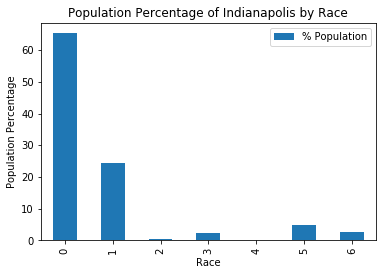

In [7]:
import matplotlib.pyplot as plt

race_frame.plot(y=["Race", "% Population"],use_index=True, kind="bar")
plt.xlabel('Race') # add to x-label to the plot
plt.ylabel('Population Percentage') # add y-label to the plot
plt.title('Population Percentage of Indianapolis by Race') # add title to the plot

# METHODOLOGY

### Selecting one neighborhood for segmenting and clustering, just to see how it works.  
A good choice will be Lawrence, since its one of our neighborhoods of interest.

In [15]:
# Select dataframe for Lawrence neighborhood
lawrence_data = indy_data[indy_data['Neighborhood'] == 'Lawrence'].reset_index(drop=True)
print(lawrence_data.shape)
lawrence_data.head()

(1, 18)


,Zipcode,Neighborhood,latitude,longitude,White,% White,Black or African American,% Black or African American,American Indian or Alaskan Native,% American Indian or Alaskan Native,Asian,% Asian,Native Hawaiian and Other Pacific Islander,%Native Hawaiian and Other Pacific Islander,Other Race,% Other Race,Two or More Races,%Two or More Races
0,46226,Lawrence,39.840172,-86.059371,"14,196",32.3%,"25,783",58.7%,132,0.3%,233,0.5%,32,0.1%,"2,121",4.8%,"1,407",3.2%


We also get the coordinates of the Lawrence neighborhood.

In [71]:
lawrence_latitude = lawrence_data.loc[0, 'latitude'] # neighborhood latitude value
lawrence_longitude = lawrence_data.loc[0, 'longitude'] # neighborhood longitude value

lawrence_name = lawrence_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(lawrence_name, 
                                                               lawrence_latitude, 
                                                               lawrence_longitude))

Latitude and longitude values of Lawrence are 39.840172, -86.059371.


Let's visualize Lawrence the neighborhood.

In [72]:
# create map of lawrence using latitude and longitude values
map_lawrence_data = folium.Map(location=[pd.to_numeric(lawrence_latitude),
                                         pd.to_numeric(lawrence_longitude)], zoom_start=11)

# add markers to map
for lat, lng, label in zip(lawrence_data['latitude'], lawrence_data['longitude'], lawrence_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [pd.to_numeric(lat), pd.to_numeric(lng)],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lawrence_data)  
    
map_lawrence_data

#### *The above map may not be visible on the GITHUP. Please check the map in the report*

## Utilizing the Foursquare API to explore the neighborhoods and segmenting them.
### Define Foursquare Credentials and Version

In [23]:
# Input my Foursquare CLIENT_ID and CLIENT_SECRET and the version number
CLIENT_ID = '0ZC5CMQGQD2CVATQOCH3PHKPHPXANS1ACRVX2G5MNVRMWOWR' 
CLIENT_SECRET = '4U53NE0PBJWQANR2WW5WJUGJTP1PJQTQSL0LZNCX0S33S304' 
VERSION = '20180605' # Foursquare API version

print('Your credentails deleted for security reasons:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails deleted for security reasons:
CLIENT_ID: 0ZC5CMQGQD2CVATQOCH3PHKPHPXANS1ACRVX2G5MNVRMWOWR
CLIENT_SECRET:4U53NE0PBJWQANR2WW5WJUGJTP1PJQTQSL0LZNCX0S33S304


### Explore 100 venues within 2000 m

Utilizing the Foursquare API to explore the neighborhoods and segmenting them.   

Now, let's get the top 100 venues that are in Lawrence within a radius of 500 meters
First, let's create the GET request URL. We name the URL as url.

In [24]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius

lat = 39.7689
long = -86.15835

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    # lawrence_latitude, 
    # lawrence_longitude, 
    lat, 
    long,
    
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=0ZC5CMQGQD2CVATQOCH3PHKPHPXANS1ACRVX2G5MNVRMWOWR&client_secret=4U53NE0PBJWQANR2WW5WJUGJTP1PJQTQSL0LZNCX0S33S304&v=20180605&ll=39.7689,-86.15835&radius=2000&limit=100'

In [68]:
results = requests.get(url).json()
# results

In [26]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

The result is then cleaned up from json to a structured pandas dataframe as shown below:

In [27]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
print(nearby_venues.shape)
nearby_venues.head(10)

(100, 4)


,name,categories,lat,lng
0,Monument Circle,Plaza,39.768382,-86.158059
1,Hilbert Circle Theatre,Concert Hall,39.768311,-86.157551
2,Rocket Fizz,Candy Store,39.768417,-86.157645
3,PEARings Frozen Yogurt & Beyond,Frozen Yogurt Shop,39.767196,-86.158345
4,The Capital Grille,American Restaurant,39.767146,-86.159310
5,Potbelly Sandwich Shop,Sandwich Place,39.768267,-86.157171
6,Qdoba Mexican Grill,Mexican Restaurant,39.767481,-86.157860
7,Indianapolis Symphony Orchestra,Rock Club,39.767982,-86.157379
8,Indiana Repertory Theatre,Performing Arts Venue,39.767060,-86.161043
9,Hyde Park Prime Steakhouse,Steakhouse,39.768381,-86.159624


### Exploring all the neighborhoods of Indianapolis City.  
Now let’s explore (Multiple) Neighborhoods in the City of Indianapolis. To do this, the function getNearbyVenues is used and it's created to repeat the same process for all neighborhoods.

In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

The created function — getNearbyVenues is then used on each neighborhood. And creates a new dataframe called indy_venues.

In [29]:
indy_data_venues = getNearbyVenues(names=indy_data['Neighborhood'],
                                   latitudes=indy_data['latitude'],
                                   longitudes=indy_data['longitude']
                                  )

Speedway
Eagle Creek
Fishers
Acton
Rocky Ripple
Indianapolis
Indianapolis
Indianapolis
Indianapolis
Warren Park
Indianapolis
Indianapolis
NoraWilliams CreekWilliams Crk
Southport
Zionsville
Beech Grove
Camby
New Palestine
West Newton
Indianapolis
Indianapolis
Indianapolis
Eagle Creek
Southport
Indianapolis
Indianapolis
Lawrence
HomecroftSouthport
Crows NestN Crows NestNorth Crows NestSpring HillsWynnedale
Cumberland
Indianapolis
Clermont
Oaklandon
Oaklandon
Wanamaker
Castleton
Castleton
Meridian HillsMeridian HlsNora
New Augusta
New Augusta


In [30]:
indy_data_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Acton,4,4,4,4,4,4
Beech Grove,39,39,39,39,39,39
Camby,7,7,7,7,7,7
Castleton,123,123,123,123,123,123
Clermont,18,18,18,18,18,18
Crows NestN Crows NestNorth Crows NestSpring HillsWynnedale,21,21,21,21,21,21
Cumberland,53,53,53,53,53,53
Eagle Creek,107,107,107,107,107,107
Fishers,100,100,100,100,100,100


#### We check on the number of unique categories of all all the returned venues. 

In [31]:
print('There are {} uniques categories.'.format(len(indy_data_venues['Venue Category'].unique())))

There are 244 uniques categories.


We check for the categories with highest frquencies

In [36]:
indy_data_venue_unique_count = indy_data_venues['Venue Category'].value_counts().to_frame(name='Count')
print(indy_data_venue_unique_count.shape)
indy_data_venue_unique_count.head(10)

(244, 1)


,Count
Pizza Place,89
Fast Food Restaurant,77
Sandwich Place,68
Gas Station,58
Discount Store,52
Mexican Restaurant,49
American Restaurant,48
Pharmacy,42
Hotel,41
Bank,38


## Clustering

 ### Create a map of Indianapolis city with the neighborhood superimposed on it.

Let's get the geographical coordinates of Indianapolis.

Use geopy library to get the latitude and longitude values of Indianapolis City. In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent Indianapolis_explorer, as shown below

In [73]:
# Get the geographical coordinates of Indianapolis.
address = 'Indianapolis'
 
geolocator = Nominatim(user_agent="Indianapolis_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Indianapolis City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Indianapolis City are 39.7683331, -86.1583502.


In [74]:
# create map of New York using latitude and longitude values
map_indianapolis = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(indy_data['latitude'], indy_data['longitude'], indy_data['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [pd.to_numeric(lat), pd.to_numeric(lng)],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_indianapolis)  
    
map_indianapolis

#### *The above map may not be visible on the GITHUP. See Map 1 in the report*

Folium is a great visualization library. We can click on each circle mark to reveal the name of the neighbourhood and its respective neighborhood.

#### Dropping the population columns

In [41]:
columns_to_drop = ['White','% White','Black or African American','% Black or African American',
                   'American Indian or Alaskan Native','% American Indian or Alaskan Native',
                   'Asian','% Asian','Native Hawaiian and Other Pacific Islander',
                   '%Native Hawaiian and Other Pacific Islander','Other Race','% Other Race','Two or More Races','%Two or More Races']

indy_data = indy_data.drop(columns_to_drop, axis=1)

indy_data.head(5)

,Zipcode,Neighborhood,latitude,longitude
0,46224,Speedway,39.794203,-86.252792
1,46254,Eagle Creek,39.8447,-86.266276
2,46038,Fishers,39.963702,-86.011348
3,46259,Acton,39.64902,-85.993206
4,46208,Rocky Ripple,39.832028,-86.176608


## Analyzing Each Neighborhood    
In this section, the objective is to check and explore the venues in each neighborhood.
We now cluster the neighborhoods in Indianapolis with respect to the processed data.

### One Hot Encoding

In [42]:
# one hot encoding
indy_data_onehot = pd.get_dummies(indy_data_venues[['Venue Category']], prefix = "", prefix_sep = "")
print(indy_data_onehot.shape)
indy_data_onehot.head()


(1774, 244)


,Accessories Store,Adult Boutique,Advertising Agency,Airport,Airport Lounge,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Candy Store,Check Cashing Service,Chinese Restaurant,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Auditorium,College Quad,College Soccer Field,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Fabric Shop,Fair,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,Fountain,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kitchen Supply Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Other Great Outdoors,Other Repair Shop,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parking,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Photography Studio,Pizza Place,Planetarium,Playground,Plaza,Pool,Print Shop,Pub,RV Park,Racetrack,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tennis Court,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Water Park,Weight Loss Center,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#### Add the Neighborhood column and re-arrangement to have the new Neighbourhood column to the first column.

In [43]:
# add neighborhood column back to dataframe
indy_data_onehot['Neighborhood'] = indy_data_venues['Neighborhood']

In [44]:
# move neighborhood column to the first column
fixed_columns = [indy_data_onehot.columns[-1]] + list(indy_data_onehot.columns[:-1])
indy_data_onehot = indy_data_onehot[fixed_columns]

#Get list of panda frame columns
cols = indy_data_onehot.columns.tolist()

#Insert the column at position 0(First column)
cols.insert(0, cols.pop(cols.index('Neighborhood')))

#Rebuil panda with new columns
indy_data_onehot = indy_data_onehot.reindex(columns= cols)
indy_data_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Advertising Agency,Airport,Airport Lounge,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Candy Store,Check Cashing Service,Chinese Restaurant,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Auditorium,College Quad,College Soccer Field,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Fabric Shop,Fair,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,Fountain,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kitchen Supply Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Other Great Outdoors,Other Repair Shop,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parking,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Photography Studio,Pizza Place,Planetarium,Playground,Plaza,Pool,Print Shop,Pub,RV Park,Racetrack,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tennis Court,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Water Park,Weight Loss Center,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Speedway,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Speedway,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

#### Check for the number of venues returned for each neighborhoods and then explore as follows:

In [45]:
indy_data_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Acton,4,4,4,4,4,4
Beech Grove,39,39,39,39,39,39
Camby,7,7,7,7,7,7
Castleton,123,123,123,123,123,123
Clermont,18,18,18,18,18,18
Crows NestN Crows NestNorth Crows NestSpring HillsWynnedale,21,21,21,21,21,21
Cumberland,53,53,53,53,53,53
Eagle Creek,107,107,107,107,107,107
Fishers,100,100,100,100,100,100


## Regrouping and categories frequencies
Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [46]:
 indy_data_grouped = indy_data_onehot.groupby('Neighborhood').mean().reset_index()
 indy_data_grouped

,Neighborhood,Accessories Store,Adult Boutique,Advertising Agency,Airport,Airport Lounge,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Candy Store,Check Cashing Service,Chinese Restaurant,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Auditorium,College Quad,College Soccer Field,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Fabric Shop,Fair,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,Fountain,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kitchen Supply Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Other Great Outdoors,Other Repair Shop,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parking,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Photography Studio,Pizza Place,Planetarium,Playground,Plaza,Pool,Print Shop,Pub,RV Park,Racetrack,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tennis Court,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Water Park,Weight Loss Center,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Acton,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.250000,0.000000,0.

#### Creating new dataframe — Putting the common venues into pandas dataframe, the following return_most_common_venues is used to sort the venues in descending order.

In [47]:
num_top_venues = 10 # Top common venues needed
for hood in indy_data_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = indy_data_grouped[indy_data_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')

----Acton----
                        venue  freq
0  Construction & Landscaping  0.25
1              Baseball Field  0.25
2                        Park  0.25
3                       Trail  0.25
4       Outdoors & Recreation  0.00
5           Other Repair Shop  0.00
6        Other Great Outdoors  0.00
7                Optical Shop  0.00
8                 Opera House  0.00
9        Pakistani Restaurant  0.00


----Beech Grove----
                  venue  freq
0                  Bank  0.08
1    Italian Restaurant  0.05
2              Pharmacy  0.05
3           Gas Station  0.05
4  Fast Food Restaurant  0.05
5           Video Store  0.05
6           Pizza Place  0.05
7                   Bar  0.05
8            Comic Shop  0.03
9                  Park  0.03


----Camby----
                        venue  freq
0            Business Service  0.29
1                Home Service  0.14
2                        Park  0.14
3                Soccer Field  0.14
4                 Golf Course  0.14
5  Con

In [48]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [49]:
num_top_venues = 25

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
indy_data_venues_sorted = pd.DataFrame(columns=columns)
indy_data_venues_sorted['Neighborhood'] = indy_data_grouped['Neighborhood']

for ind in np.arange(indy_data_grouped.shape[0]):
    indy_data_venues_sorted.iloc[ind, 1:] = return_most_common_venues(indy_data_grouped.iloc[ind, :], num_top_venues)

indy_data_venues_sorted.head(41)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue
0,Acton,Baseball Field,Construction & Landscaping,Trail,Park,Farm,Ethiopian Restaurant,Event Space,Fabric Shop,Fair,Yoga Studio,Donut Shop,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Electronics Store,Doctor's Office,Dog Run,Food,Dive Bar,Discount Store,Disc Golf,Diner,Dessert Shop
1,Beech Grove,Bank,Pharmacy,Pizza Place,Bar,Gas Station,Video Store,Fast Food Restaurant,Italian Restaurant,Gun Shop,Park,Baseball Field,Sporting Goods Shop,Liquor Store,Mexican Restaurant,Bowling Alley,Breakfast Spot,Sandwich Place,Discount Store,Record Shop,Print Shop,Coffee Shop,Japanese Restaurant,Comic Shop,Vietnamese Restaurant,Ice Cream Shop
2,Camby,Business Service,Construction & Landscaping,Home Service,Soccer Field,Golf Course,Park,Event Space,Donut Shop,Electronics Store,Ethiopian Restaurant,Yoga Studio,Fabric Shop,Dog Run,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fair,Dive Bar,Doctor's Office,Flower Shop,Discount Store,Disc Golf,Diner,Dessert Shop
3,Castleton,Sandwich Place,Pizza Place,Clothing Store,Furniture / Home Store,Department Store,Mexican Restaurant,Toy / Game Store,Pet Store,Park,Grocery Store,Coffee Shop,Cosmetics Shop,Shoe Store,Shipping Store,Bar,Sporting Goods Shop,Pharmacy,Italian Restaurant,Arts & Crafts Store,Sushi Restaurant,Ice Cream Shop,Seafood Restaurant,Chinese Restaurant,Thai Restaurant,Golf Course
4,Clermont,Racetrack,Bar,Pizza Place,Ice Cream Shop,Gas Station,Sandwich Place,Athletics & Sports,Food Court,Pub,Trail,Home Service,Gym,Bowling Alley,Wine Bar,Gymnastics Gym,Baseball Field,Fabric Shop,Event Space,Fair,Ethiopian Restaurant,Farm,Electronics Store,Donut Shop,Dog Run,Doctor's Office
5,Crows NestN Crows NestNorth Crows NestSpring H...,Gas Station,Golf Course,Tennis Court,Park,Discount Store,BBQ Joint,Electronics Store,Burger Joint,Pizza Place,Storage Facility,Dance Studio,Grocery Store,Video Store,Coffee Shop,American Restaurant,Mobile Phone Shop,Convenience Store,Pharmacy,Sandwich Place,Fabric Shop,Event Space,Ethiopian Restaurant,Donut Shop,Fair,Dog Run
6,Cumberland,Sandwich Place,Pizza Place,Pharmacy,Discount Store,American Restaurant,Thrift / Vintage Store,Mexican Restaurant,Fast Food Restaurant,Fabric Shop,Big Box Store,Lingerie Store,Shoe Store,Pub,Supplement Shop,Japanese Restaurant,Chinese Restaurant,Bar,Bank,Sporting Goods Shop,Bakery,Intersection,Steakhouse,Supermarket,Clothing Store,Fried Chicken Joint
7,Eagle Creek,Gas Station,Fast Food Restaurant,Discount Store,Pizza Place,Video Store,Coffee Shop,Mexican Restaurant,Hotel,Gym / Fitness Center,Bank,Shoe Store,Mobile Phone Shop,Grocery Store,Liquor Store,Chinese Restaurant,Gun Range,Pharmacy,Thrift / Vintage Store,Shopping Mall,Video Game Store,Convenience Store,Pub,Paper / Office Supplies Store,Rental Car Location,Pakistani Restaurant
8,Fishers,Pizza Place,Sandwich Place,Mexican Restaurant,Gym,Gym / Fitness Center,Coffee Shop,Spa,American Restaurant,Breakfast Spot,Pharmacy,Bakery,Bank,Shoe Store,Salon / Barbershop,Sushi Restaurant,Recreation Center,Liquor Store,Dessert Shop,Convenience Store,Sports Bar,Ice Cream Shop,Video Store,Gas Station,Athletics & Sports,Rental Car Location
9,HomecroftSouthport,Pizza Place,Gas Station,Mexican Restaurant,Chinese Restaurant,Bank,Bar,Sandwich Place,Salon / Barbershop,Donut Shop,Discount Store,Coffee Shop,Bus Station,Fast Food Restaurant,Breakfast Spot,Big Box Store,Dance Studio,Supermarket,Par

Creating new dataframe — Putting the common venues, say 25, into pandas dataframe, the following return_most_common_venuesis used to sort the venues in descending order.

Clustering of Neighbourhoods — We create the grouped clustering for the neighbourhood as shown below:

In [50]:
indy_data_grouped_clustering = indy_data_grouped.drop('Neighborhood', 1)
indy_data_grouped_clustering.head()

,Accessories Store,Adult Boutique,Advertising Agency,Airport,Airport Lounge,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Candy Store,Check Cashing Service,Chinese Restaurant,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Auditorium,College Quad,College Soccer Field,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Fabric Shop,Fair,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,Fountain,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kitchen Supply Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Other Great Outdoors,Other Repair Shop,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parking,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Photography Studio,Pizza Place,Planetarium,Playground,Plaza,Pool,Print Shop,Pub,RV Park,Racetrack,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tennis Court,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Water Park,Weight Loss Center,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.000000,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.250000,0.0,0.00000,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000

And then create clusters of the neighbourhood using the k-means to cluster the neighbourhood into 5 clusters (this was decided after checking the Elbow Method and Silhouette Coefficients).

In [51]:
# set number of clusters
k =5
# run k-means clustering
kmeans = KMeans(n_clusters = k, random_state=0).fit(indy_data_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [53]:
k_means = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [55]:
# add clustering labels
indy_data_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [57]:
indy_data_temp = indy_data

indy_data_cluster = indy_data_temp.join(indy_data_venues_sorted.set_index('Neighborhood'), on = 'Neighborhood')

indy_data_cluster.head(40) # check the last columns!

,Zipcode,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue
0,46224,Speedway,39.794203,-86.252792,1,Racetrack,American Restaurant,Fast Food Restaurant,Sandwich Place,Pizza Place,Discount Store,Bank,Campground,Gas Station,Department Store,Video Store,Bar,Miscellaneous Shop,Cosmetics Shop,Mexican Restaurant,Wings Joint,Shoe Store,Liquor Store,Farmers Market,Big Box Store,Shipping Store,Breakfast Spot,Brewery,Golf Course,Mobile Phone Shop
1,46254,Eagle Creek,39.8447,-86.266276,1,Gas Station,Fast Food Restaurant,Discount Store,Pizza Place,Video Store,Coffee Shop,Mexican Restaurant,Hotel,Gym / Fitness Center,Bank,Shoe Store,Mobile Phone Shop,Grocery Store,Liquor Store,Chinese Restaurant,Gun Range,Pharmacy,Thrift / Vintage Store,Shopping Mall,Video Game Store,Convenience Store,Pub,Paper / Office Supplies Store,Rental Car Location,Pakistani Restaurant
2,46038,Fishers,39.963702,-86.011348,1,Pizza Place,Sandwich Place,Mexican Restaurant,Gym,Gym / Fitness Center,Coffee Shop,Spa,American Restaurant,Breakfast Spot,Pharmacy,Bakery,Bank,Shoe Store,Salon / Barbershop,Sushi Restaurant,Recreation Center,Liquor Store,Dessert Shop,Convenience Store,Sports Bar,Ice Cream Shop,Video Store,Gas Station,Athletics & Sports,Rental Car Location
3,46259,Acton,39.64902,-85.993206,2,Baseball Field,Construction & Landscaping,Trail,Park,Farm,Ethiopian Restaurant,Event Space,Fabric Shop,Fair,Yoga Studio,Donut Shop,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Electronics Store,Doctor's Office,Dog Run,Food,Dive Bar,Discount Store,Disc Golf,Diner,Dessert Shop
4,46208,Rocky Ripple,39.832028,-86.176608,1,Park,Golf Course,Discount Store,Historic Site,Sandwich Place,Coffee Shop,BBQ Joint,Intersection,Bank,Bar,College Quad,College Auditorium,Beer Garden,Basketball Stadium,Gas Station,Fast Food Restaurant,Massage Studio,Chinese Restaurant,Museum,Office,Tennis Court,Pharmacy,Ice Cream Shop,Sculpture Garden,Performing Arts Venue
5,46220,Indianapolis,39.866058,-86.101651,1,Pizza Place,Fast Food Restaurant,Discount Store,Gas Station,Hotel,Bar,Sandwich Place,Park,Mexican Restaurant,American Restaurant,Pharmacy,Liquor Store,Chinese Restaurant,Coffee Shop,Bank,Gym,Breakfast Spot,Grocery Store,Trail,Brewery,Pub,Café,Video Store,Fried Chicken Joint,Burger Joint
6,46241,Indianapolis,39.716911,-86.261552,1,Pizza Place,Fast Food Restaurant,Discount Store,Gas Station,Hotel,Bar,Sandwich Place,Park,Mexican Restaurant,American Restaurant,Pharmacy,Liquor Store,Chinese Restaurant,Coffee Shop,Bank,Gym,Breakfast Spot,Grocery Store,Trail,Brewery,Pub,Café,Video Store,Fried Chicken Joint,Burger Joint
7,46204,Indianapolis,39.77275,-86.159447,1,Pizza Place,Fast Food Restaurant,Discount Store,Gas Station,Hotel,Bar,Sandwich Place,Park,Mexican Restaurant,American Restaurant,Pharmacy,Liquor Store,Chinese Restaurant,Coffee Shop,Bank,Gym,Breakfast Spot,Grocery Store,Trail,Brewery,Pub,Café,Video Store,Fried Chicken Joint,Burger Joint
8,46202,Indianapolis,39.780667,-86.16635,1,Pizza Place,Fast Food Restaurant,Discount Store,Gas Station,Hotel,Bar,Sandwich Place,Park,Mexican Restaurant,American Restaurant,Pharmacy,Liquor Store,Chinese Restaurant,Coffee Shop,Bank,Gym,Breakfast Spot,Grocery Store,Trail,Brewery,Pub,Café,Video Store,Fried Chicken Joint,Burger Joint
9,46219,Warren Park,39.782954,-86.046125,1,Hotel,Fast Food Restaurant,American Restaurant,Sandwich Place,Pizza Place,Rental Car Location,Gas Station,Discount Sto

#### Finally, let's visualize the resulting clusters

In [75]:
map_clusters = folium.Map(location=[39.7683331,-86.1583502],zoom_start=10)
# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
              
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(indy_data_cluster['latitude'], 
                                  indy_data_cluster['longitude'],
                                  indy_data_cluster['Neighborhood'], 
                                  indy_data_cluster['Cluster Labels']):
      
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [pd.to_numeric(lat), pd.to_numeric(lon)],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
display(map_clusters)

#### *The above map may not be visible on the GITHUP. See Map 2 in the report*

#### Examine Clusters
Now, we examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.

### Cluster 1

In [61]:
indy_data_cluster.loc[indy_data_cluster['Cluster Labels'] == 0, indy_data_cluster.columns[[1] + list(range(5, indy_data_cluster.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue
16,Camby,Business Service,Construction & Landscaping,Home Service,Soccer Field,Golf Course,Park,Event Space,Donut Shop,Electronics Store,Ethiopian Restaurant,Yoga Studio,Fabric Shop,Dog Run,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fair,Dive Bar,Doctor's Office,Flower Shop,Discount Store,Disc Golf,Diner,Dessert Shop


### Cluster 2

In [62]:
# Cluster 2
indy_data_cluster.loc[indy_data_cluster['Cluster Labels'] == 1, indy_data_cluster.columns[[1] + list(range(5, indy_data_cluster.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue
0,Speedway,Racetrack,American Restaurant,Fast Food Restaurant,Sandwich Place,Pizza Place,Discount Store,Bank,Campground,Gas Station,Department Store,Video Store,Bar,Miscellaneous Shop,Cosmetics Shop,Mexican Restaurant,Wings Joint,Shoe Store,Liquor Store,Farmers Market,Big Box Store,Shipping Store,Breakfast Spot,Brewery,Golf Course,Mobile Phone Shop
1,Eagle Creek,Gas Station,Fast Food Restaurant,Discount Store,Pizza Place,Video Store,Coffee Shop,Mexican Restaurant,Hotel,Gym / Fitness Center,Bank,Shoe Store,Mobile Phone Shop,Grocery Store,Liquor Store,Chinese Restaurant,Gun Range,Pharmacy,Thrift / Vintage Store,Shopping Mall,Video Game Store,Convenience Store,Pub,Paper / Office Supplies Store,Rental Car Location,Pakistani Restaurant
2,Fishers,Pizza Place,Sandwich Place,Mexican Restaurant,Gym,Gym / Fitness Center,Coffee Shop,Spa,American Restaurant,Breakfast Spot,Pharmacy,Bakery,Bank,Shoe Store,Salon / Barbershop,Sushi Restaurant,Recreation Center,Liquor Store,Dessert Shop,Convenience Store,Sports Bar,Ice Cream Shop,Video Store,Gas Station,Athletics & Sports,Rental Car Location
4,Rocky Ripple,Park,Golf Course,Discount Store,Historic Site,Sandwich Place,Coffee Shop,BBQ Joint,Intersection,Bank,Bar,College Quad,College Auditorium,Beer Garden,Basketball Stadium,Gas Station,Fast Food Restaurant,Massage Studio,Chinese Restaurant,Museum,Office,Tennis Court,Pharmacy,Ice Cream Shop,Sculpture Garden,Performing Arts Venue
5,Indianapolis,Pizza Place,Fast Food Restaurant,Discount Store,Gas Station,Hotel,Bar,Sandwich Place,Park,Mexican Restaurant,American Restaurant,Pharmacy,Liquor Store,Chinese Restaurant,Coffee Shop,Bank,Gym,Breakfast Spot,Grocery Store,Trail,Brewery,Pub,Café,Video Store,Fried Chicken Joint,Burger Joint
6,Indianapolis,Pizza Place,Fast Food Restaurant,Discount Store,Gas Station,Hotel,Bar,Sandwich Place,Park,Mexican Restaurant,American Restaurant,Pharmacy,Liquor Store,Chinese Restaurant,Coffee Shop,Bank,Gym,Breakfast Spot,Grocery Store,Trail,Brewery,Pub,Café,Video Store,Fried Chicken Joint,Burger Joint
7,Indianapolis,Pizza Place,Fast Food Restaurant,Discount Store,Gas Station,Hotel,Bar,Sandwich Place,Park,Mexican Restaurant,American Restaurant,Pharmacy,Liquor Store,Chinese Restaurant,Coffee Shop,Bank,Gym,Breakfast Spot,Grocery Store,Trail,Brewery,Pub,Café,Video Store,Fried Chicken Joint,Burger Joint
8,Indianapolis,Pizza Place,Fast Food Restaurant,Discount Store,Gas Station,Hotel,Bar,Sandwich Place,Park,Mexican Restaurant,American Restaurant,Pharmacy,Liquor Store,Chinese Restaurant,Coffee Shop,Bank,Gym,Breakfast Spot,Grocery Store,Trail,Brewery,Pub,Café,Video Store,Fried Chicken Joint,Burger Joint
9,Warren Park,Hotel,Fast Food Restaurant,American Restaurant,Sandwich Place,Pizza Place,Rental Car Location,Gas Station,Discount Store,Pharmacy,Bank,Video Store,Gym / Fitness Center,Grocery Store,Furniture / Home Store,Chinese Restaurant,Gym,Convenience Store,Intersection,Breakfast Spot,Shipping Store,Food,Bowling Alley,Department Store,Seafood Restaurant,Pub
10,Indianapolis,Pizza Place,Fast Food Restaurant,Discount Store,Gas Station,Hotel,Bar,Sandwich Place,Park,Mexican Restaurant,American Restaurant,Pharmacy,Liquor Store,Chinese Restaurant,Coffee Shop,Bank,Gym,Breakfast Spot,Grocery Store,Trail,Brewery,Pub,Café,Video Store,Fried Chicken Joint,Burger Joint


### Cluster 3

In [63]:
# Cluster 3
indy_data_cluster.loc[indy_data_cluster['Cluster Labels'] == 2, indy_data_cluster.columns[[1] + list(range(5, indy_data_cluster.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue
3,Acton,Baseball Field,Construction & Landscaping,Trail,Park,Farm,Ethiopian Restaurant,Event Space,Fabric Shop,Fair,Yoga Studio,Donut Shop,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Electronics Store,Doctor's Office,Dog Run,Food,Dive Bar,Discount Store,Disc Golf,Diner,Dessert Shop


### Cluster 4

In [64]:
# Cluster 4
indy_data_cluster.loc[indy_data_cluster['Cluster Labels'] ==3, indy_data_cluster.columns[[1] + list(range(5, indy_data_cluster.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue
14,Zionsville,Pool,Home Service,Restaurant,Irish Pub,Park,Trail,Soccer Field,Gym,Pub,Construction & Landscaping,Dive Bar,Farmers Market,Farm,Fair,Fabric Shop,Event Space,Ethiopian Restaurant,Electronics Store,Donut Shop,Dog Run,Doctor's Office,Disc Golf,Discount Store,Convenience Store,Diner


### Cluster 5

In [65]:
# Cluster 5
indy_data_cluster.loc[indy_data_cluster['Cluster Labels'] == 4, indy_data_cluster.columns[[1] + list(range(5, indy_data_cluster.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue
18,West Newton,Historic Site,Farm,Gym,Market,Business Service,Dog Run,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Fair,Fabric Shop,Event Space,Ethiopian Restaurant,Electronics Store,Donut Shop,Doctor's Office,Fondue Restaurant,Dive Bar,Discount Store,Disc Golf,Diner,Dessert Shop,Department Store,Deli / Bodega


# RESULTS
The city of Indianapolis has a total of 1774 venues with 244 distinct categories. 

The top 5 neighborhoods with the highest number of returned venues are Indianapolis (602), Southport (134), Castleton (123), Eagle Creek (107), and Fishers (100).

The venue categories with the highest frequencies of at least 50 were Pizza Place (89), Fast Food Restaurant (76), Sandwich Place (68), Gas Station (58), Discount Stores (52).

An examination of the five clusters reveals that Cluster 2 has the greatest similarity of the top 10 venues returned.  Clusters 1, 3, 4, and 5 do not have much similarity within themselves and with cluster 2.

The Lawrence neighborhood with the zip code 46226 was the second most populated zip code in the city of Indianapolis with a population of over 43,000. The results indicate that no restaurant featured in the top five common venue categories returned.  The results further reveal that no African/Caribbean restuarant featured in the top 25 venue categories returned.

# DISCUSSION
A further examination of the neighborhoods in Cluster 2 revealed that the heavily populated neighborhood Lawrence, has has no restaurant in the top 5 venue categories returned.  It is also striking that this neighborhood, whose population of is over 25,000 or 58% Black or African Americans has no restaurant of African/Caribbean cuisine in the entire neighborhood. 
From these results, Lawrence is a suitable neighborhood for a new restaurant of African/Caribbean cuisine. Lawrence is surrounded by another densely populated neighborhood Castleton which has no restaurant reported in the top 5 venue categories returned. A restaurant in Lawrence will therefore equally be of service to the large population in Castleton.

# CONCLUSION
The project set out to use a computational method to determine the best location for a new restaurant of African/Caribbean cuisine in the neighborhoods of Indianapolis.  Using data collected from US Census and Foursquare API, and using segmentation and clustering methods, we have been able to realize the project, with the result that Lawrence neighborhood is the most suitable location. A restaurant in this location is beneficial to the populations of Lawrence neighborhood and that of the nearby neighborhood of Castleton, where no restaurant exists in the top 5 venue categories returned. 

# RECOMMENDATIONS
It is highly recommended that investors in the restaurant industry should use the results of this project and put up a new restaurant in the Lawrence neighborhood, zip code 46226 of Indianapolis. A restaurant of African/Caribbean cuisine is preferable in order to serve the majority population of the neighborhood which is Black/African Americans.

# LIMITATIONS 
The work and the results are limited to the data collect from Foursquare API and US Census 2018 ACS 5-Year Survey (Table B03002). The population data were estimates of 2018. The aspect of the security of the neighborhood in terms of crime wave has not been handled. 

# FUTURE PERSPECTIVES 	
 This study could be extended to include traffic flow in the neighborhood is a factor to consider.

# REFERENCES
[1] US Census 2018 ACS 5-Year Survey (https://www.zip-codes.com/zip-code/46235/zip-code-46235.asp)

[2] Foursquare API (https://developer.foursquare.com/docs)


##                                                  END